In [1]:
import scanpy as sc
import singleCellHaystack as hs

sc.set_figure_params(facecolor="white", dpi=90)

# Load data

In [2]:
adata = sc.datasets.pbmc3k_processed()
adata

100%|██████████| 23.5M/23.5M [00:00<00:00, 83.4MB/s]


AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/Users/diez/miniconda3/envs/singleCellHaystack/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


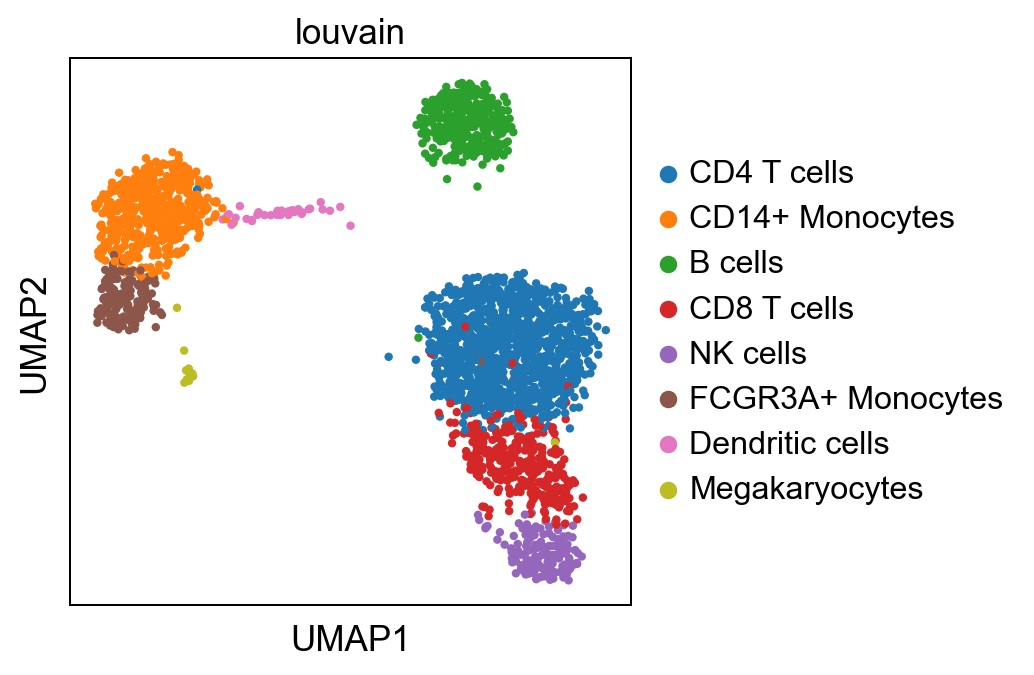

In [3]:
sc.pl.umap(adata, color="louvain")

# Run haystack

In [4]:
res = hs.haystack(adata.raw.to_adata(), coord="umap", n_randomizations=100, n_genes_to_randomize=100, spline_method="ns")

> starting haystack ...
> entering array method ...
> scaling coordinates ...
> calculating feature stds ...
> removing 1 genes with zero variance ...
> calculating grid points ...
> calculating distance to cells ...
> calculating densities ...
> calculating Q dist ...
> calculating KLD for 13713 features ...


100%|██████████| 13713/13713 [00:02<00:00, 5448.06it/s]


> calculating feature's CV ...
> selecting genes to randomize ...
> calculating randomized KLD ...


100%|██████████| 100/100 [00:02<00:00, 35.19it/s]


> calculating P values ...
> done.


# QC

We can examine some of the QC plots. First the randomization fits. These are used to calculate KLD from randomized expression levels for a subset of genes, in order to estimate the values to the entire gene set.

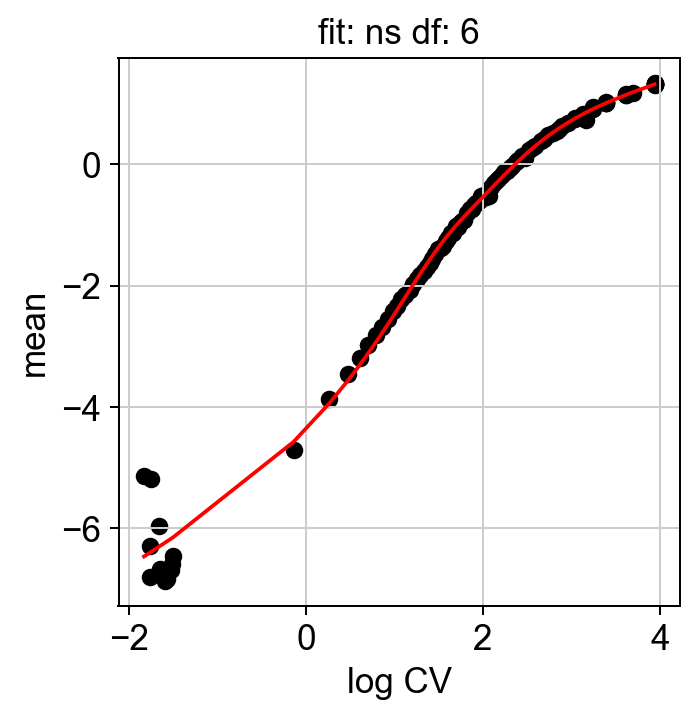

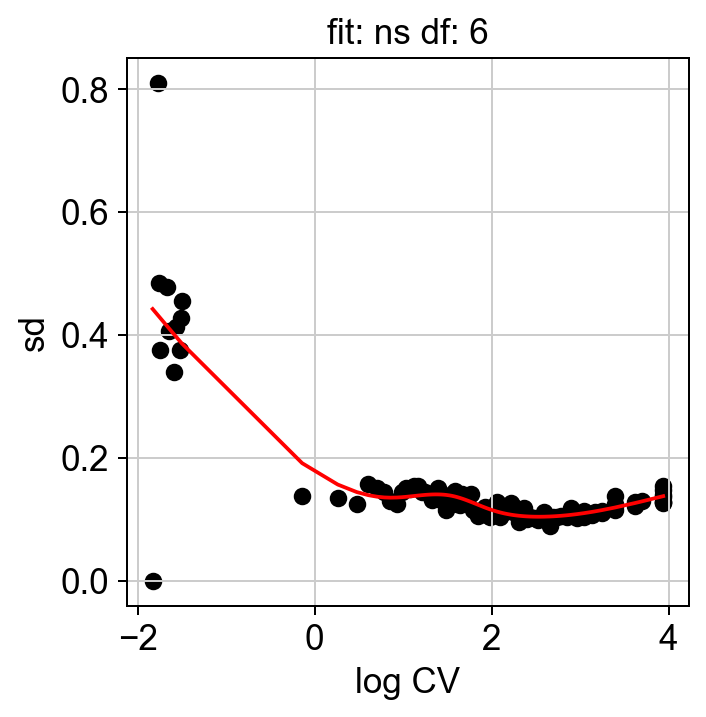

In [5]:
hs.plot_rand_fit(res, "mean")
hs.plot_rand_fit(res, "sd")

The ranking of logpval and distribution of pval gives us some idea of how many significant genes we can detect.

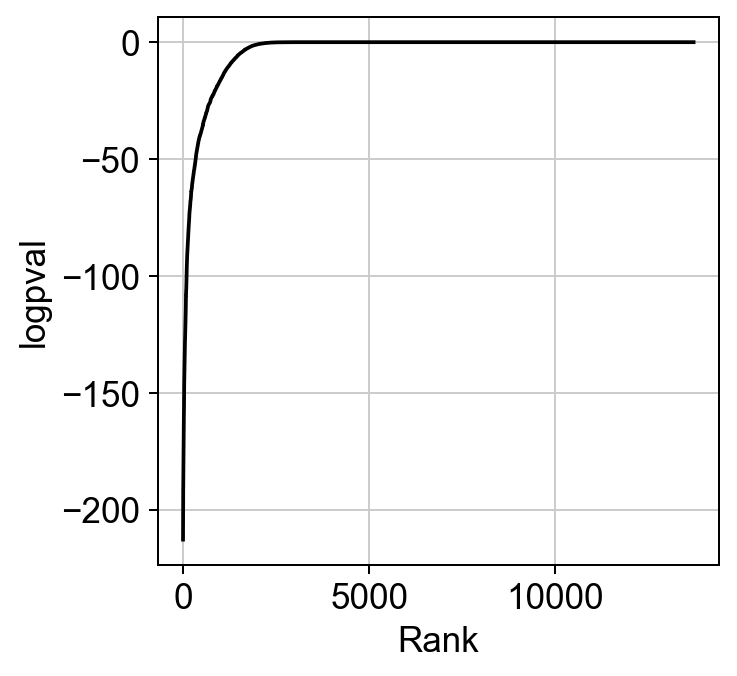

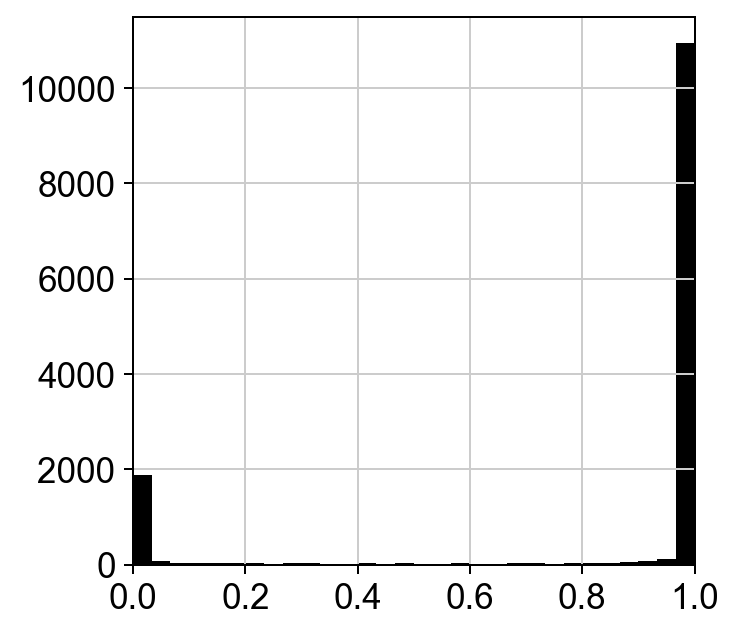

In [6]:
hs.plot_pval_rank(res)
hs.plot_pval_hist(res)

# Results

A pandas DataFrame with the results can be obtained. By default the results are sorted by logpval_adj.

In [7]:
sum = res["results"]
sum

,gene,KLD,pval,pval_adj,logpval,logpval_adj
12672,TYROBP,0.824173,1.599725e-213,2.193703e-209,-2.127960e+02,-208.658822
11877,CST3,0.815731,3.897961e-204,5.345273e-200,-2.034092e+02,-199.272030
1049,FCER1G,0.846571,1.201772e-200,1.647989e-196,-1.999202e+02,-195.783046
4370,AIF1,0.760218,2.209666e-193,3.030115e-189,-1.926557e+02,-188.518541
4411,HLA-DRB1,0.586864,3.156285e-193,4.328214e-189,-1.925008e+02,-188.363691
...,...,...,...,...,...,...
12907,DHX34,0.739196,1.000000e+00,1.000000e+00,-3.953615e-50,0.000000
9270,RP11-468E2.4,0.422861,1.000000e+00,1.000000e+00,-4.794212e-52,0.000000
10260,ABCC1,0.422078,1.000000e+00,1.000000e+00,-2.038303e-52,0.000000
11911,PXMP4,0.590625,1.000000e+00,1.000000e+00,-1.197850e-52,0.000000


Plot top 4 genes.

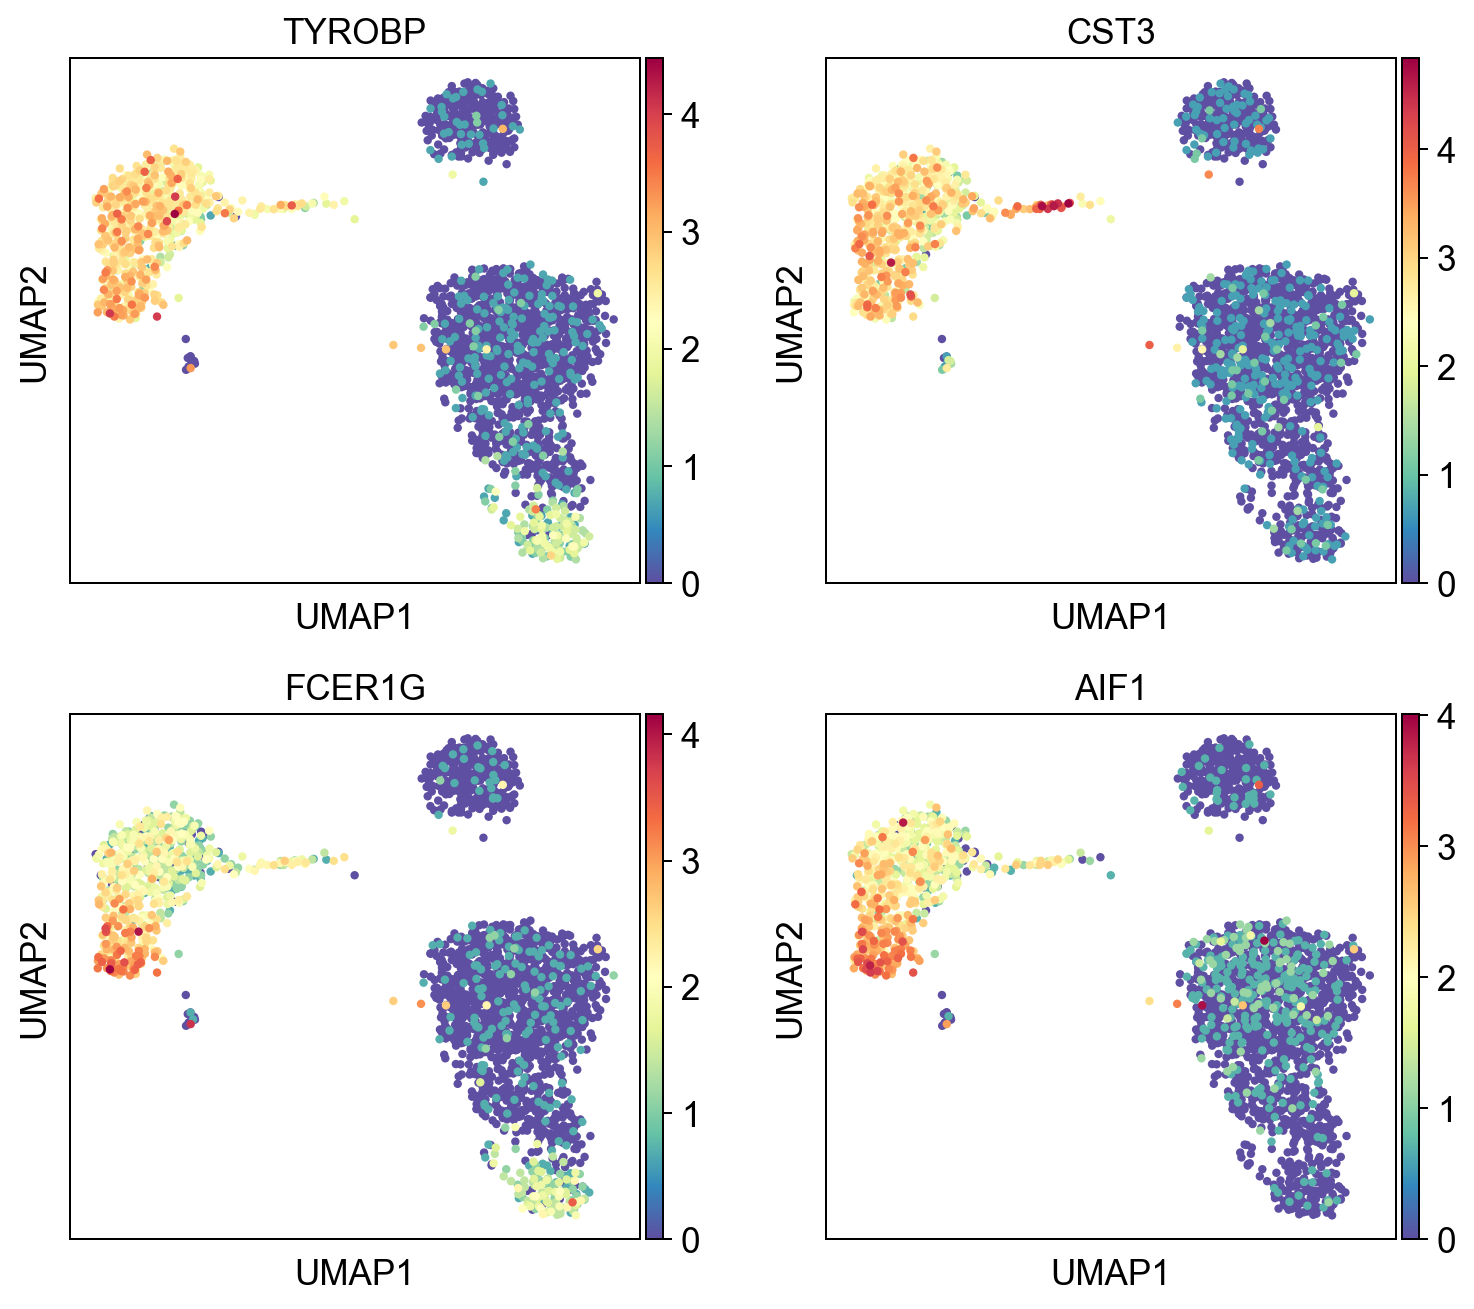

In [8]:
sc.pl.umap(adata, color=sum.gene.iloc[:4], ncols=2, cmap="Spectral_r")

# Export results

In [9]:
#sum.to_csv("pbmc3k-results.tsv")